# Interpolación, lo último de lo último....

In [1]:
%matplotlib inline

import matplotlib.pyplot as plt

### Ejercicio 1 (Lagrange)
Sea $f(x)=2\sin(\pi x/6)$ (con el ángulo medido ern radianes):
1. Use el polinomio interpolador de Lagrange cuadrático con nodos $x_0=0,x_1=1 y x_2=3$ para aproximar f(2) y f(2.4)
2. Use el polinomio interpolador de Lagrange cuadrático con nodos $x_0=0,x_1=1 y x_2=5$ para aproximar f(2) y f(2.4)
3. Use el polinomio interpolador de Lagrange cuadrático con nodos $x_0=0,x_1=1 y x_2=3$ para aproximar f(4) y f(3.5)
4. Use el polinomio interpolador de Lagrange cúbico con nodos $x_0=0,x_1=1 y x_2=5$ para aproximar f(4) y f(3.5)

In [2]:
import numpy as np
def interp_cuadr(x, p0, p1, p2):
    x0, y0 = p0
    x1, y1 = p1
    x2, y2 = p2
    
    return y0*((x-x1)*(x-x2)/((x0-x1)*(x0-x2)))+y1*((x-x0)*(x-x2)/((x1-x0)*(x1-x2)))+y2*((x-x1)*(x-x0)/((x2-x0)*(x2-x1)))#formula de interpolacion cuadratica

$f(x)$ interpolada con el primer conjunto de nodos

In [18]:
a=np.pi/6

X = [0, 1, 3]
X2 = [0,1*a,3*a]
Y2 = 2*np.sin(X2)
Points = list(zip(X2,Y2)) 

yinterpolada = interp_cuadr(2, Points[2], Points[1], Points[0])
"{:.4}, {:.4}, error = {:.4e}".format(yinterpolada, 2*(np.sin(np.pi*(2/6))), 2*(np.sin(np.pi*(2/6))) - yinterpolada)
print('Aproximación de f(2) por interpolación cuadrática')
print('f(x) interpolada =',yinterpolada) 
print('f(x) real = ',2*(np.sin(np.pi*(2/6))))
print('Error =  ', 2*(np.sin(np.pi*(2/6))) - yinterpolada)

Aproximación de f(2) por interpolación cuadrática
f(x) interpolada = 2.0246299991569625
f(x) real =  1.7320508075688772
Error =   -0.2925791915880853


In [16]:
yinterpolada = interp_cuadr(2, Points[2], Points[1], Points[0])
"{:.4}, {:.4}, error = {:.4e}".format(yinterpolada, 2*(np.sin(np.pi*(2.4/6))), 2*(np.sin(np.pi*(2.4/6))) - yinterpolada)
print('Aproximación de f(2.4) por interpolación cuadrática')
print('f(x) interpolada =',yinterpolada) 
print('f(x) real = ',2*(np.sin(np.pi*(2.4/6))))
print('Error =  ', 2*(np.sin(np.pi*(2.4/6))) - yinterpolada)

Aproximación de f(2.4) por interpolación cuadrática
f(x) interpolada = 2.0246299991569625
f(x) real =  1.902113032590307
Error =   -0.12251696656665545


In [3]:
def interp_cubic(x, p0, p1, p2, p3):
    x0, y0 = p0
    x1, y1 = p1
    x2, y2 = p2
    x3, y3 = p2
    
    A=((x-x1)*(x-x2)*(x-x3))/((x0-x1)*(x0-x2)*(x0-x3))
    B=((x-x0)*(x-x2)*(x-x3))/((x1-x0)*(x1-x2)*(x1-x3))
    C=((x-x0)*(x-x1)*(x-x3))/((x2-x0)*(x2-x1)*(x2-x3))
    D=((x-x0)*(x-x1)*(x-x2))/((x3-x0)*(x3-x1)*(x3-x2))
    
    
    return y0*A+y1*B+y2*C+y3*D
        

a=np.pi/6

X = [0, 1, 3, 5]
X2 = [0,1*a,3*a,5*a]
Y2 = 2*np.sin(X2)
Points = list(zip(X2,Y2))
        
print(Points)
yinterpolada = interp_cubic(4, Points[1], Points[0], Points[1], Points[3])
#"{:.4}, {:.4}, error = {:.4e}".format(yinterpolada, 2*(np.sin(np.pi*(4/6))), 2*(np.sin(np.pi*(4/6))) - yinterpolada)
print('Aproximación de f(2.4) por interpolación cuadrática')
print('f(x) interpolada =',yinterpolada) 
print('f(x) real = ',2*(np.sin(np.pi*(4/6))))
print('Error =  ', 2*(np.sin(np.pi*(4/6))) - yinterpolada)

[(0, 0.0), (0.5235987755982988, 0.9999999999999999), (1.5707963267948966, 2.0), (2.617993877991494, 1.0000000000000007)]


ZeroDivisionError: float division by zero

### Ejercicio 2 (Newton)

Use los centros $x_0=-3, x_1=-1, x_2=1, x_3=4$ y $x_4=2$ y los coeficientes $a_0=-2, a_1=4, a2=-0.04, a_3=0.06, a_4=0.005$ para hallar los polinomios interpoladores de Newton $P_1(x), P_1(x), P_1(x)$ y $P_1(x)$ y calcule los valores de estos polinomios en $x=2$

# Interpolación mediante polinomio

Si tenemos $N$ puntos, el polinomio generado por estos puntos será de orden menor o igual a $N-1$, pero cuando $N$ empieza a ser grande (10<=N) puede ocurrir, si no escogemos muy cuidadosamente lo puntos, que oscilen salvajemente. Esto se conoce como fenómeno de Runge.

Sea 
$$ f(x)=\frac{1}{1+x^2}$$

Interpolemos con nodos equidistantes, usando el método de interpolación baricéntrica o interpolación polinómica, el cuál recibe la variable a evaluar el polinomio y los nodos, con sus respectivos $x$ y $y$.

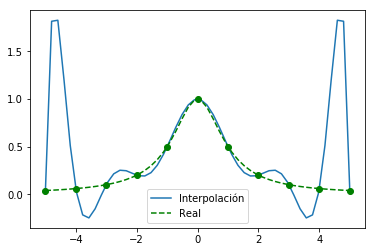

In [2]:
import numpy as np
from scipy.interpolate import barycentric_interpolate
def runge(x):
    """Función de Runge."""
    return 1 / (1 + x ** 2)
N = 11  # Nodos de interpolación
xp = np.arange(11) - 5  # -5, -4, -3, ..., 3, 4, 5
fp = runge(xp)
x = np.linspace(-5, 5)
y = barycentric_interpolate(xp, fp, x)


l,= plt.plot(x, y)
plt.plot(x, runge(x), '--g')
plt.plot(xp, fp, 'o',color='green')
leg = plt.legend(['Interpolación', 'Real'])

Una manera fácil de solucionar esto, es escoger "cuidadosamente" puntos. El mejor truco para esto es usar las raíces de los polinomios de Chebyshev. Para tener 11 nodos, usamos un polinomio de Chebyshev de grado 11.

Un polinomio de Chebyshev de cualquier tipo de grado $N$ tiene $N$ raíces simples distintas, llamadas nodos de Chebyshev, en el intervalo $[-1,1]$. Usando:

$$
T_n(\cos \theta)= \cos (n\theta)
$$

$$
\cos\left(\frac{\pi}{2}(2k+1)\right)=0
$$

con raíces:

$$
x_k=\cos \left( \frac{\pi}{2}\frac{2k-1}{n} \right)
$$

con $k=1,2,\cdots,n$

In [3]:
from numpy.polynomial import chebyshev
coeffs_cheb = [0] * 11 + [1]  # Solo queremos el elemento 11 de la serie
T11 = chebyshev.Chebyshev(coeffs_cheb, [-5, 5])
xp_ch = T11.roots()
# -4.949, -4.548, -3.779, -2.703, ..., 4.548, 4.949 Raíces de los polinomios de Chebyschev
print(xp_ch)

[-4.94910721e+00 -4.54815998e+00 -3.77874787e+00 -2.70320409e+00
 -1.40866278e+00 -1.34623782e-15  1.40866278e+00  2.70320409e+00
  3.77874787e+00  4.54815998e+00  4.94910721e+00]


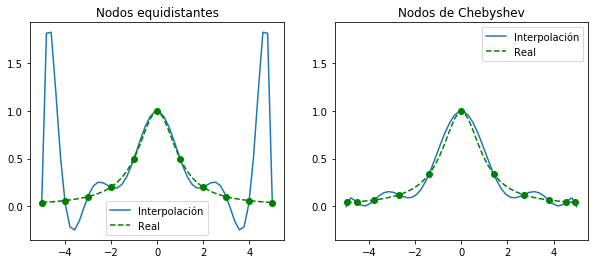

In [4]:
from numpy.polynomial import chebyshev

xp = np.arange(11) - 5  # -5, -4, -3, ..., 3, 4, 5
fp = runge(xp)
x = np.linspace(-5, 5)
y = barycentric_interpolate(xp, fp, x)

coeffs_cheb = [0] *11 + [1]
T11 = chebyshev.Chebyshev(coeffs_cheb, [-5, 5])

xp_ch = T11.roots()
fp_ch = runge(xp_ch)

y_ch = barycentric_interpolate(xp_ch, fp_ch, x)

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(10, 4))

l1, = ax1.plot(x, y)
ax1.plot(x, runge(x), '--g')
ax1.plot(xp, fp, 'o', color='green')
ax1.set_title("Nodos equidistantes")
leg1 = ax1.legend(['Interpolación', 'Real'])


l2, = ax2.plot(x, y_ch)
ax2.plot(x, runge(x), '--g')
ax2.plot(xp_ch, fp_ch, 'og')
ax2.set_ylim(ax1.get_ylim())
ax2.set_title("Nodos de Chebyshev")
leg2 = ax2.legend(['Interpolación', 'Real'])

En este Notebook usamos la función barycentric_interpolate. Intenta hacer tu propio código de la función baricéntrica. 

In [7]:
#Aquí va tu función.